In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()

In [66]:
measures = '../Data/data_differentiator_bode.txt'
simulation_noC = '../Data/Simulations/DIFF_OUT.txt'
simulation_C = '../Data/Simulations/DIFF_OUT_C.txt'

data = pd.read_csv(measures, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['dec', 'H (dB)', 'err X', 'err H']

sim = pd.read_csv(simulation_noC, sep = '\t', index_col = False, header = None)
sim.index = np.arange(1, len(sim)+1)
sim.columns = ['dec', 'H (dB)']

sim2 = pd.read_csv(simulation_C, sep = '\t', index_col = False, header = None)
sim2.index = np.arange(1, len(sim2)+1)
sim2.columns = ['dec', 'H (dB)']

In [12]:
data.drop('err X', axis='columns', inplace=True)

In [67]:
sim2['dec'] = np.log10(sim2['dec'])
sim2

,dec,H (dB)
1,2.0,-25.913546
2,2.1,-23.913606
3,2.2,-21.913702
4,2.3,-19.913854
5,2.4,-17.914094
6,2.5,-15.914475
7,2.6,-13.915079
8,2.7,-11.916036
9,2.8,-9.917552
10,2.9,-7.919954


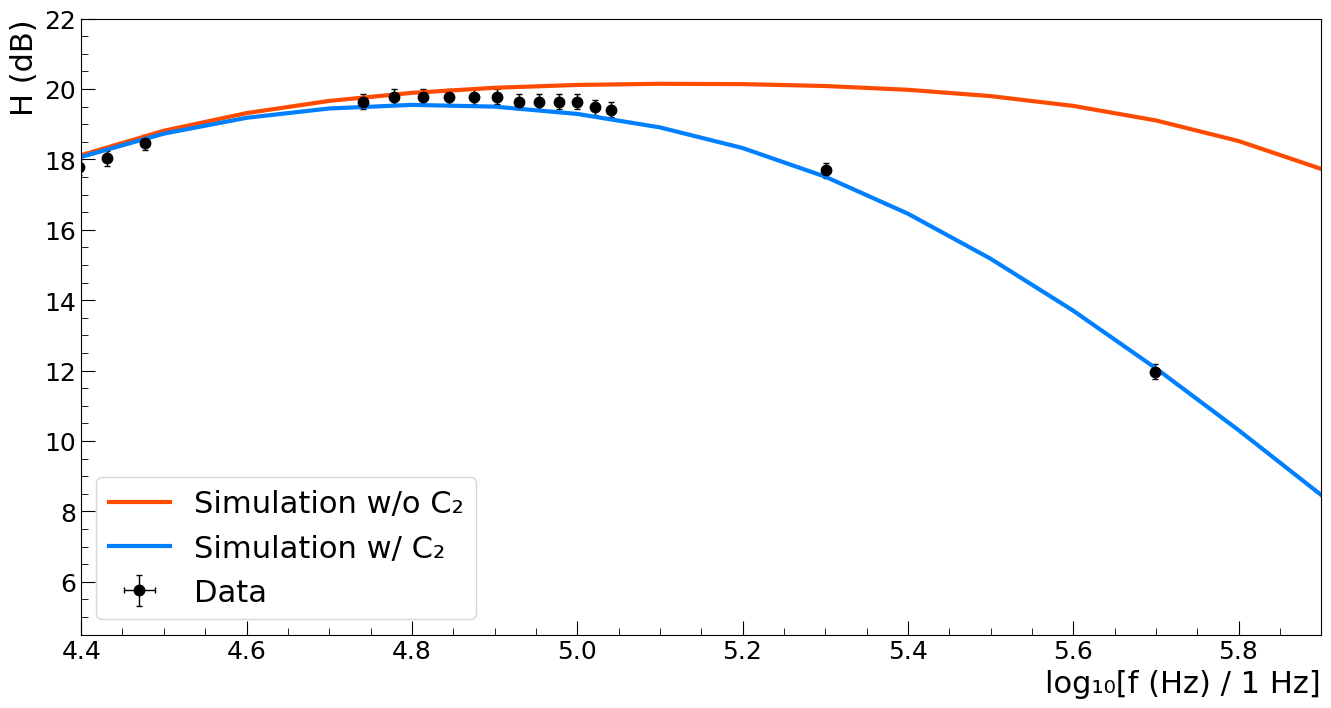

In [71]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.errorbar(data['dec'], data['H (dB)'], xerr=0, yerr=data['err H'], marker = '.',
             elinewidth=1, color = '#000000', linewidth=0, capsize=2, label = 'Data', markersize = 15)

# PLOT SIMULATION WITHOUT C
ax1.plot(sim['dec'], sim['H (dB)'], color = '#FF4B00', linewidth = 3, label = 'Simulation w/o C\u2082')

# PLOT SIMULATION WITH C
ax1.plot(sim2['dec'], sim2['H (dB)'], color = '#0080ff', linewidth = 3, label = 'Simulation w/ C\u2082')

# AXIS LABELS
ax1.set_xlabel('log\u2081\u2080[f (Hz) / 1 Hz]', fontsize = 22, loc = 'right')
ax1.set_ylabel('H (dB)', fontsize = 22, loc = 'top')


# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()


# PLOT RANGE
ax1.set_xlim(left = 4.4, right = 5.9)
ax1.set_ylim(bottom = 4.5, top = 22)

# MAKE LEGEND
ax1.legend(loc = 'best', prop = {'size': 22})

# SAVE FIGURE
fig.savefig('../Plots/Report_Plots/diff_sim_comp.png', dpi = 300)

plt.show()

In [12]:
file = '../Data/data_differentiator_bode_r.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['dec', 'H (dB)', 'err H']
data_fit = data.iloc[:3, :]
data_fit

,dec,H (dB),err H
1,2.0,-25.468929,0.151412
2,3.0,-6.020600,0.099868
3,4.0,12.617084,0.107802


In [4]:
# LINEAR FUCTION
def lin(x, a, b):
    return a + b * x
    

In [16]:
# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data_fit['dec'], ydata = data_fit['H (dB)'], sigma = data_fit['err H'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []

for i in range(len(par_lin)):
    try:
        error.append(np.absolute(cov_lin[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par_lin
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# COMPUTE RESIDUALS
func = lin(data_fit['dec'], *par_lin)
res = data_fit['H (dB)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/data_fit['err H'])**2)

print('Offset: ' + format(a, '1.2f') + ' +/- ' + format(err_a, '1.2f') + '\n' + 'Slope: ' + format(b, '1.2f') + ' +/- ' + format(err_b, '1.2f'))

print(chi2)

Offset: -63.18 +/- 0.30
Slope: 18.98 +/- 0.09
8.82777270256867
